In [2]:
import pandas as pd
import numpy as np 
from faker import Faker
from enum import Enum
from typing import List, Any, Tuple, Dict
import string
import uuid
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable, ALL, FRAME
from html import escape

In [3]:
person_entity = {
    "userId": str, 
    "username": str, 
    "password": str, 
    "email": str, 
    "name": str, 
    "surname": str, 
    "clinical_gender": ["M", "F"], 
    "current_location": [], 
    "age_range": ["20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-100"],
    "living_country": [], 
    "country_of_origin": []
    }

user_entity = {
    "current_working_status": ["Half-time-worker", "Full-time-worker", "Self-employee", "Unemployed"],
    "marital_status": ["Single", "Married"], 
    "life_style": ["Sedentary", "Lightly active", "Moderately active", "Very active"], 
    "weight": [],
    "ethnicity": ["White", "Black", "Latino", "Asian"], 
    "height": []
}

cultural_factors = {
    "vegan_observant": [True, False],
    "vegetarian_observant": [True, False], 
    "halal_observant": [True, False], 
    "kosher_observant": [True, False],
    "religion_observant": [True, False], 
    "drink_limitation": [True, False], 
    "pescatarian_observant": [True, False],
    "religion": [],
    "food_limitation": []
}

sustainability = {
    "environmental_harm": [],
    "eco_score": [],
    "co2_food_print": [],
    "recyclable_packaging": []
}

actions = {
    "action_type": [],
    "location": [], 
    "action_date": []
}

preferences = {
    "breakfast_time": [],
    "lunch_time": [],
    "dinner_time": []
}

health_conditions = {
    "food_allergies": []
}

user_goals = {
    "user_goals": ["loss_weight", "fit", "food_restrictions"]
}

cultural_factors = {
    "cultural_factors": []
}

diet = {
    "diet_daily_calories": [],
    "calorie_deficit": []
}

    

In [4]:
df_personal_data = pd.DataFrame(data=[], columns = list(person_entity.keys()))

In [5]:
# set seed for random generator 
np.random.seed(0)

In [6]:
df_personal_data["clinical_gender"] = np.random.choice(np.array(person_entity.get("clinical_gender")), 
                                                       size=500, 
                                                       replace=True, 
                                                       p=[0.5, 0.5])

In [7]:
fake = Faker()

In [8]:
class Gender(str, Enum):
    male = "M"
    female = "F"

In [9]:
def create_name_surname(gender: str) -> str:
    if gender == Gender.male:
        names = fake.name_male()
    else:
        names = fake.name_female()
    return names.split(" ")

In [10]:
def generate_country(samples) -> List:
    return list(map(lambda x: fake.country(), range(samples)))

In [11]:
def generate_email_from_name(name: str, surname: str, domain: str="fake.com"):
    return f"{name.lower()}.{surname.lower()}@{domain.lower()}"

In [12]:
def password_generation(length): 
    chars = string.ascii_letters + string.digits
    list_chars = list(chars)
    password = np.random.choice(list_chars, length)
    return ''.join(password)

In [13]:
def generate_age_range(probabilities = None, list_age_range:List = person_entity.get("age_range")):
    return np.random.choice(list_age_range, size=1, replace=True, p=probabilities)[0]

In [14]:
def generate_localization(samples): 
    return list(map(lambda x: fake.locale(), range(samples)))

In [15]:
names = df_personal_data["clinical_gender"].apply(create_name_surname)

In [16]:
names_list = list(zip(*names))

In [17]:
df_personal_data["name"] = names_list[0]
df_personal_data["surname"] = names_list[1]

In [18]:
df_personal_data["country_of_origin"] = generate_country(500)
df_personal_data["living_country"] = generate_country(500)
df_personal_data["current_location"] = generate_country(500)
df_personal_data["current_location"] = generate_localization(500)

In [19]:
list_names = list(zip(*df_personal_data[["name", "surname"]].values.tolist()))

In [20]:
df_personal_data["email"] =list(map(lambda x, y: generate_email_from_name(x, y), list_names[0], list_names[1]))

In [21]:
df_personal_data["password"] = list(map(lambda x: password_generation(8), range(500)))

In [22]:
df_personal_data["username"] = df_personal_data["name"].apply(lambda x: x.lower()+str(uuid.uuid4()).split("-")[-2])
df_personal_data["userId"] = df_personal_data["name"].apply(lambda x: x.lower()+str(uuid.uuid4()).split("-")[-2])

In [23]:
df_personal_data["age_range"] = list(map(lambda x: generate_age_range(), range(500)))

In [24]:
df_personal_data.head(7)

,userId,username,password,email,name,surname,clinical_gender,current_location,age_range,living_country,country_of_origin
0,helen8f67,helena67d,NQ7CysdS,helen.fleming@fake.com,Helen,Fleming,F,pap_AW,70-79,Tajikistan,Faroe Islands
1,staceyb817,stacey8bf0,tT2akdgB,stacey.turner@fake.com,Stacey,Turner,F,ln_CD,80-89,Madagascar,Slovenia
2,miss8a35,missaefe,J5gtIYYM,miss.sarah@fake.com,Miss,Sarah,F,aa_ET,70-79,Bahamas,Botswana
3,mary97cb,marybe00,uR2aKTPc,mary.park@fake.com,Mary,Park,F,ky_KG,30-39,Canada,Sri Lanka
4,daniel9360,daniela1af,Hmp2Hxmf,daniel.young@fake.com,Daniel,Young,M,hne_IN,80-89,Hong Kong,Reunion
5,barbara9dbf,barbara97a0,Mbkg9gMM,barbara.hall@fake.com,Barbara,Hall,F,nn_NO,20-29,Iceland,New Caledonia
6,charles9915,charles81bc,lYvYYZcm,charles.davis@fake.com,Charles,Davis,M,mai_IN,90-100,Papua New Guinea,Zambia


In [25]:
# save data 
df_personal_data.to_csv("personal_profiles.csv", index=False)

# 2. Generate User data 

In [26]:
user_columns = ["userId", "current_working_status", "marital_status", "life_style", "weight", "ethnicity", "height"]
df_user_entity = pd.DataFrame(data=[], columns=user_columns)

In [27]:
df_user_entity["userId"] = df_personal_data["userId"]

In [28]:
def choose_one_from_list(list_values: List, 
                         samples : int,  
                         probabilities: List = None, 
                         size: int =1,
                         replace: bool = True):
    return list(map(lambda x: np.random.choice(list_values, size=size, replace=replace, p=probabilities), range(samples)))

In [29]:
df_user_entity["current_working_status"] = choose_one_from_list(user_entity.get("current_working_status"), samples=500)
df_user_entity["marital_status"] = choose_one_from_list(user_entity.get("marital_status"), samples=500)
df_user_entity["life_style"] = choose_one_from_list(user_entity.get("life_style"), samples=500)
df_user_entity["ethnicity"] = choose_one_from_list(user_entity.get("ethnicity"), samples=500)

In [30]:
# generate BMI cases 
BMI_values = ["underweight", "healthy", "overweight", "obesity"]
BMI_prob = [0.1, 0.3, 0.3, 0.3]
bmis = np.random.choice(BMI_values, size=500, replace=True, p=BMI_prob)

In [31]:
male_height = np.random.normal(170, 10, 500)
female_height = np.random.normal(160, 10, 500)

In [32]:
# set height 
df_user_entity["BMI"] = bmis

In [33]:
df_user_entity.loc[df_personal_data["clinical_gender"] == 'F',"height"] = np.random.choice(female_height, size=246)
df_user_entity.loc[df_personal_data["clinical_gender"] == 'M',"height"] = np.random.choice(male_height, size=254)

In [34]:
df_user_entity["height"] = df_user_entity["height"].astype(int)

In [35]:
class BMI_constants(str, Enum):
    underweight = "underweight"
    healthy = "healthy"
    overweight = "overweight"
    obesity = "obesity"

In [36]:
# set the weight 
def calculate_weight_from_height(height: float, bmi: string):
    bmi_numeric = 0.0
    if bmi == BMI_constants.underweight:
        bmi_numeric = 18.0
    elif bmi == BMI_constants.healthy:
        bmi_numeric = 21.0
    elif bmi == BMI_constants.overweight:
        bmi_numeric = 28.0
    else:
        bmi_numeric = 32.0
    return (height**2)*bmi_numeric

In [37]:
df_user_entity["weight"] = np.round(df_user_entity.apply(lambda row: calculate_weight_from_height(row["height"]/100.0, row["BMI"]), axis=1), 2)

In [38]:
df_user_entity["current_working_status"] = df_user_entity["current_working_status"].apply(lambda x: x[0])
df_user_entity["marital_status"] = df_user_entity["marital_status"].apply(lambda x: x[0])
df_user_entity["life_style"] = df_user_entity["life_style"].apply(lambda x: x[0])
df_user_entity["ethnicity"] = df_user_entity["ethnicity"].apply(lambda x: x[0])

In [39]:
df_user_entity.head(6)

,userId,current_working_status,marital_status,life_style,weight,ethnicity,height,BMI
0,helen8f67,Unemployed,Married,Sedentary,66.36,Black,144,obesity
1,staceyb817,Unemployed,Single,Sedentary,88.18,Latino,166,obesity
2,miss8a35,Half-time-worker,Single,Very active,75.31,Black,164,overweight
3,mary97cb,Unemployed,Married,Lightly active,47.25,Latino,150,healthy
4,daniel9360,Full-time-worker,Single,Moderately active,91.73,Asian,181,overweight
5,barbara9dbf,Full-time-worker,Single,Lightly active,39.43,Latino,148,underweight


In [40]:
df_user_entity.to_csv("user_entity.csv", index=False)

# 3. Generate health conditions 

In [41]:
df_health_conditions = pd.DataFrame(data=[], columns=["userId", "allergy"])

In [42]:
df_health_conditions["userId"] = df_user_entity["userId"]

In [43]:
# allergy array 
allergies = ["cow's milk", "eggs", "peanut", "soy", "fish", "tree nuts", "shellfish", "wheat", "None"]
allergies_prob = [0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.4]

In [44]:
user_allergies = np.random.choice(allergies, size=500, replace=True, p = allergies_prob)

In [45]:
df_health_conditions["allergy"] = user_allergies

In [46]:
df_health_conditions.head(6)

,userId,allergy
0,helen8f67,cow's milk
1,staceyb817,eggs
2,miss8a35,None
3,mary97cb,soy
4,daniel9360,eggs
5,barbara9dbf,eggs


In [47]:
df_health_conditions.to_csv("health_conditions.csv", index=False)

# 4. Generate user goals

In [48]:
# define user goals 
# define loose weight 
df_user_goals = pd.DataFrame(columns=["userId", "nutrition_goal"], data=[])

In [49]:
df_user_goals["userId"] = df_user_entity["userId"]

In [50]:
class NutritionGoals(str, Enum):
    lose_weight = "lose_weight"
    maintain_fit = "maintain_fit"
    gain_weight = "gain_weight"

In [51]:
def define_user_goal_according_BMI(bmi: str):
    if bmi == BMI_constants.underweight:
        # goal gain muscle 
        return f"{NutritionGoals.gain_weight}"
    elif bmi == BMI_constants.healthy:
        # Maintain fit and increase activity if required 
        return f"{NutritionGoals.maintain_fit}"
    else:
        # nutritional goal loss weight 
        return f"{NutritionGoals.lose_weight}"

In [52]:
df_user_goals["nutrition_goal"]=df_user_entity["BMI"].apply(lambda x: define_user_goal_according_BMI(x))

In [53]:
df_user_goals.head(6)

,userId,nutrition_goal
0,helen8f67,lose_weight
1,staceyb817,lose_weight
2,miss8a35,lose_weight
3,mary97cb,maintain_fit
4,daniel9360,lose_weight
5,barbara9dbf,gain_weight


# 4. Generate cultural factors 

In [54]:
df_cultural_factors = pd.DataFrame(data=[], columns=["userId", "cultural_factor"])

In [55]:
df_cultural_factors["userId"] = df_personal_data["userId"]

In [136]:
food_restrictions = ["vegan_observant", "vegetarian_observant", "halal_observant", "kosher_observant", "flexi_observant", "None"]
food_restriction_probs = [0.2, 0.3, 0.05, 0.05, 0.1, 0.3]

In [138]:
food_restrictions_user = np.random.choice(food_restrictions, size=500, replace=True, p=food_restriction_probs)

In [139]:
df_cultural_factors["cultural_factor"] = food_restrictions_user

In [142]:
df_cultural_factors["probabilities"] =  None

In [144]:
def generate_probabilities_for_flexi(cultural_factors):
    #TODO: generate different for the flexibles 
    
    pass

In [143]:
df_cultural_factors.head(6)

,userId,cultural_factor,probabilities
0,helen8f67,vegetarian_observant,None
1,staceyb817,vegetarian_observant,None
2,miss8a35,vegetarian_observant,None
3,mary97cb,None,None
4,daniel9360,vegetarian_observant,None
5,barbara9dbf,vegan_observant,None


In [60]:
df_cultural_factors.to_csv("cultural_factors.csv", index=False)

# 5. Generate preferences

In [61]:
df_preferences = pd.DataFrame(data=[], columns=["userId", "breakfast_time", "lunch_time", "dinner_time"])

In [62]:
df_preferences["userId"] = df_personal_data["userId"]

In [63]:
breakfast_time = np.random.normal(7, 1, size=500)
lunch_time = np.random.normal(13, 1, size=500)
dinner_time = np.random.normal(20, 1, size=500)

In [64]:
df_preferences["breakfast_time"] = np.round(breakfast_time, 2)
df_preferences["lunch_time"] = np.round(lunch_time, 2)
df_preferences["dinner_time"] = np.round(dinner_time, 2)

In [65]:
df_preferences.head(6)

,userId,breakfast_time,lunch_time,dinner_time
0,helen8f67,7.38,11.53,19.98
1,staceyb817,7.69,13.00,20.49
2,miss8a35,6.94,12.64,20.73
3,mary97cb,7.72,13.43,19.75
4,daniel9360,8.67,10.78,20.36
5,barbara9dbf,7.51,14.31,21.27


In [66]:
df_preferences.to_csv("preferences.csv", index=False)

# 6. Generate Therapy (Diet)

Based on Harris-Benedict equations:
* For men: 
  $BMR = 13.397W + 4.799H - 5.677A + 88.362$
* For women: 
  $BMR = 9.247W + 3.098H - 4.330A + 447.593$

In [67]:
def calculate_basal_metabolic_rate(weight: float, height: float, age: int, clinical_gender: str):
    BMR = 0
    if Gender.male == clinical_gender:
        BMR = 88.362 + (13.397 * weight) + (4.799 * height) - (5.677 * age)
    else:
        BMR = 447.593 + (9.247 * weight) + (3.098 * height) - (4.330 * age)
    return BMR

In [68]:
class ActivityLevel(str, Enum): 
    sedentary = "Sedentary"
    light_active = "Lightly active"
    moderate_active = "Moderately active"
    very_active = "Very active"

In [69]:
def calculate_daily_calorie_needs(BMR: float, activity_level: str):
    calories_daily = 0
    if activity_level == ActivityLevel.sedentary:
        calories_daily = 1.2 * BMR
    elif activity_level == ActivityLevel.light_active:
        calories_daily = 1.375 * BMR
    elif activity_level == ActivityLevel.moderate_active:
        calories_daily = 1.725 * BMR
    else:
        calories_daily = 1.9 * BMR
    return calories_daily

In [70]:
def define_daily_calorie_needs(nutrition_goal: str, daily_calorie_need: float):
    projected_calories_need = 0 
    if nutrition_goal == NutritionGoals.gain_weight:
        projected_calories_need = daily_calorie_need + 500
    elif nutrition_goal == NutritionGoals.maintain_fit:
        projected_calories_need = daily_calorie_need
    else:
        projected_calories_need = daily_calorie_need - 500
    return projected_calories_need

In [71]:
def generate_diet_plan(weight: float, 
                       height: float, 
                       age_range: str, 
                       clinical_gender: str, 
                       activity_level: str, 
                       nutrition_goal: str): 
    # transform age 
    age_list = age_range.split("-")
    age = np.ceil((int(age_list[-1]) - int(age_list[0]))/2 + int(age_list[0]))
    bmr = calculate_basal_metabolic_rate(weight, height, age, clinical_gender)
    calorie_needs = calculate_daily_calorie_needs(bmr, activity_level)
    projected_calorie_needs = define_daily_calorie_needs(nutrition_goal, calorie_needs)
    return projected_calorie_needs
    

In [72]:
# generate treatment for the users 
df_treatment = pd.DataFrame(data=[], columns=["userId", "projected_daily_calories"])
df_treatment["userId"] = df_personal_data["userId"]


In [73]:
# prepare data
df_user_data = df_user_goals.merge(df_personal_data[["userId", "clinical_gender", "age_range"]],
                                  on="userId")


In [74]:
df_user_data = df_user_data.merge(df_user_entity[["userId","life_style", "weight", "height"]], 
                                  on="userId")

In [75]:
df_treatment["projected_daily_calories"] = np.ceil(df_user_data.apply(lambda row: generate_diet_plan(weight=row["weight"], 
                                                  height=row["height"], 
                                                  age_range=row["age_range"],
                                                  clinical_gender=row["clinical_gender"],
                                                  activity_level=row["life_style"],
                                                  nutrition_goal=row["nutrition_goal"]
                                                  ), axis=1))

In [76]:
df_treatment.head(4)

,userId,projected_daily_calories
0,helen8f67,920.0
1,staceyb817,1192.0
2,miss8a35,2022.0
3,mary97cb,1647.0


In [77]:
df_treatment.to_csv("projected_calories.csv", index=False)

In [78]:
df_treatment["projected_daily_calories"].min(axis=0)

779.0

In [79]:
df_cultural_factors

,userId,cultural_factor
0,helen8f67,vegetarian_observant
1,staceyb817,kosher_observant
2,miss8a35,vegetarian_observant
3,mary97cb,vegan_observant
4,daniel9360,vegan_observant
...,...,...
495,dr.a99f,None
496,stephenaa68,None
497,johna419,None
498,darrena6f1,vegetarian_observant


# 7. Data Analysis

In [80]:
df_personal_data.head(3)

,userId,username,password,email,name,surname,clinical_gender,current_location,age_range,living_country,country_of_origin
0,helen8f67,helena67d,NQ7CysdS,helen.fleming@fake.com,Helen,Fleming,F,pap_AW,70-79,Tajikistan,Faroe Islands
1,staceyb817,stacey8bf0,tT2akdgB,stacey.turner@fake.com,Stacey,Turner,F,ln_CD,80-89,Madagascar,Slovenia
2,miss8a35,missaefe,J5gtIYYM,miss.sarah@fake.com,Miss,Sarah,F,aa_ET,70-79,Bahamas,Botswana


In [81]:
df_user_entity.head(4)

,userId,current_working_status,marital_status,life_style,weight,ethnicity,height,BMI
0,helen8f67,Unemployed,Married,Sedentary,66.36,Black,144,obesity
1,staceyb817,Unemployed,Single,Sedentary,88.18,Latino,166,obesity
2,miss8a35,Half-time-worker,Single,Very active,75.31,Black,164,overweight
3,mary97cb,Unemployed,Married,Lightly active,47.25,Latino,150,healthy


In [82]:
df_health_conditions.head(3)

,userId,allergy
0,helen8f67,cow's milk
1,staceyb817,eggs
2,miss8a35,None


In [83]:
users = df_user_entity[df_user_entity["BMI"] == "underweight"]["userId"]

In [84]:
list(users.values)

['barbara9dbf',
 'samantha8a06',
 'kristen970b',
 'amber827d',
 'bobbyb3f8',
 'sierra9a20',
 'christopherace7',
 'rickbdb2',
 'jason9341',
 'douglas9983',
 'danielab2e',
 'michele9238',
 'ericb656',
 'kimberlyb739',
 'anthonybc70',
 'lynn8108',
 'daniel9ea8',
 'susanbf37',
 'roberta0d9',
 'jenniferbd33',
 'paula0c9',
 'christinab6ad',
 'james94fe',
 'jared80f5',
 'mary943c',
 'rebeccaa6f6',
 'lorib7f6',
 'lisa84d7',
 'gregory9c84',
 'ashley9c25',
 'felicia9f29',
 'ericabcc3',
 'pamela8ffa',
 'john8819',
 'brenda9912',
 'michaelaa61',
 'aaronbc88',
 'karina9815',
 'michelleabb3',
 'jason8ba6']

In [85]:
vals = df_health_conditions["allergy"].value_counts()

In [86]:
list(zip(list(vals.index), list(vals.values)))

[('None', 199),
 ('peanut', 47),
 ('wheat', 39),
 ('eggs', 38),
 ("cow's milk", 36),
 ('fish', 36),
 ('shellfish', 36),
 ('soy', 35),
 ('tree nuts', 34)]

In [87]:
vals.index

Index(['None', 'peanut', 'wheat', 'eggs', 'cow's milk', 'fish', 'shellfish',
       'soy', 'tree nuts'],
      dtype='object', name='allergy')

In [88]:
vals.values

array([199,  47,  39,  38,  36,  36,  36,  35,  34])

In [89]:
weight_condition = df_user_entity["BMI"].value_counts()

In [90]:
weight_condition.sum()

500

In [91]:
a = "{0}: {1}"

In [92]:
a.format("a", "b")

'a: b'

In [93]:
def format_dict_text(tuple_values: Tuple):
    text_template = "{0}: {1}"
    return text_template.format(tuple_values[0], tuple_values[1])

In [94]:
def format_multiline(list_to_format: List[Any]): 
    format_string = " \t ".join(list_to_format)
    return format_string

In [95]:
def draw_summary_row(row_text, character = "-", up_multiplicity=0, down_multiplicity=0): 
    print(f"{character*up_multiplicity}")
    print(f"| {row_text} |")
    if down_multiplicity > 0:
        print(f"{character*down_multiplicity}")

In [96]:
weight_condition = df_user_entity["BMI"].value_counts()
for condition in weight_condition.index:
    print(condition)

healthy
overweight
obesity
underweight


# 8 Simulation 

In [97]:
from scipy.stats import bernoulli

In [98]:
p = np.array([[0.65, 0.35, 0.0, 0.0], 
              [0.05, 0.80, 0.15, 0.0],
              [0.0, 0.28, 0.67, 0.05],
              [0.0, 0.0, 0.35, 0.65]
              ])

In [99]:
def simulate_final_result(probability_matrix: np.array, samples_size_list: Dict[str, int], state_list: List[str]):
    # generate transitions 
    transitions =  {}
    states = ['underweight', 'healthy', 'overweight', 'obesity']
    for i, state in enumerate(states):
        initial_state = state
        sample_size = samples_size_list[state]
        transitions[initial_state] = {}
        for j in range(probability_matrix.shape[1]):
            if sample_size > 0 and probability_matrix[i][j] > 0.0:
                next_state = state_list[j]
                transition_sample = bernoulli.rvs(probability_matrix[i][j], size=sample_size)
                transitions[initial_state][next_state] = transition_sample.tolist()
                sample_size -= sum(transition_sample)
    return transitions

In [100]:
counts = df_user_entity.groupby(by="BMI").count()["userId"]

In [101]:
transition_matrix = simulate_final_result(p, dict(counts.items()), counts.index)

In [102]:
transition_matrix

{'underweight': {'healthy': [1,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   1,
   1,
   0,
   1,
   0,
   0,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   0,
   0,
   1,
   1,
   1,
   0],
  'obesity': [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]},
 'healthy': {'healthy': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   1,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
  

In [103]:
df_user_entity

,userId,current_working_status,marital_status,life_style,weight,ethnicity,height,BMI
0,helen8f67,Unemployed,Married,Sedentary,66.36,Black,144,obesity
1,staceyb817,Unemployed,Single,Sedentary,88.18,Latino,166,obesity
2,miss8a35,Half-time-worker,Single,Very active,75.31,Black,164,overweight
3,mary97cb,Unemployed,Married,Lightly active,47.25,Latino,150,healthy
4,daniel9360,Full-time-worker,Single,Moderately active,91.73,Asian,181,overweight
...,...,...,...,...,...,...,...,...
495,dr.a99f,Self-employee,Single,Lightly active,69.02,Asian,157,overweight
496,stephenaa68,Half-time-worker,Single,Lightly active,93.57,Asian,171,obesity
497,johna419,Full-time-worker,Single,Moderately active,72.96,Latino,151,obesity
498,darrena6f1,Full-time-worker,Married,Lightly active,61.41,Black,171,healthy


In [104]:
df_user_data.head(3)

,userId,nutrition_goal,clinical_gender,age_range,life_style,weight,height
0,helen8f67,lose_weight,F,70-79,Sedentary,66.36,144
1,staceyb817,lose_weight,F,80-89,Sedentary,88.18,166
2,miss8a35,lose_weight,F,70-79,Very active,75.31,164


In [105]:
df_user_join = df_user_data.merge(df_treatment, on="userId")
df_user_join = df_user_join.merge(df_cultural_factors,  on="userId")
df_user_join = df_user_join.merge(df_health_conditions,  on="userId")
df_user_join = df_user_join.merge(df_user_entity[["userId", "BMI"]],  on="userId")

In [106]:
df_user_join.to_csv("simulation_ready_user_data.csv", index=False, sep="|")

In [107]:
# load recipes data 
df_recipes = pd.read_csv("processed_recipes_dataset.csv", sep="|")

In [108]:
df_recipes_filter = df_recipes[df_recipes["calories"]>=0.0]

In [109]:
df_user_join

,userId,nutrition_goal,clinical_gender,age_range,life_style,weight,height,projected_daily_calories,cultural_factor,allergy,BMI
0,helen8f67,lose_weight,F,70-79,Sedentary,66.36,144,920.0,vegetarian_observant,cow's milk,obesity
1,staceyb817,lose_weight,F,80-89,Sedentary,88.18,166,1192.0,kosher_observant,eggs,obesity
2,miss8a35,lose_weight,F,70-79,Very active,75.31,164,2022.0,vegetarian_observant,None,overweight
3,mary97cb,maintain_fit,F,30-39,Lightly active,47.25,150,1647.0,vegan_observant,soy,healthy
4,daniel9360,lose_weight,M,80-89,Moderately active,91.73,181,2439.0,vegan_observant,eggs,overweight
...,...,...,...,...,...,...,...,...,...,...,...
495,dr.a99f,lose_weight,M,40-49,Lightly active,69.02,157,1578.0,None,None,overweight
496,stephenaa68,lose_weight,M,60-69,Lightly active,93.57,171,1967.0,None,None,obesity
497,johna419,lose_weight,M,80-89,Moderately active,72.96,151,1757.0,None,eggs,obesity
498,darrena6f1,maintain_fit,M,50-59,Lightly active,61.41,171,1952.0,vegetarian_observant,cow's milk,healthy


In [110]:
df_recipes_filter

,title,raw_text,meal_type,cultural_restriction,calories,allergies
0,Fruit Salad,"1. Fruit Salad: 70 calories per portion, 4 por...",breakfast,vegan,70.0,contains fruits only
1,Vegan Pancakes,"2. Vegan Pancakes: 150 calories per portion, 4...",breakfast,vegan,150.0,NaN
2,Overnight Chia Pudding,3. Overnight Chia Pudding: 200 calories per po...,breakfast,vegan,200.0,contains nuts (almonds)
3,Avocado Toast,"4. Avocado Toast: 250 calories per portion, 2 ...",breakfast,vegan,250.0,NaN
4,Vegan Omelette,"5. Vegan Omelette: 300 calories per portion, 1...",breakfast,vegan,300.0,contains chickpea flour
...,...,...,...,...,...,...
10195,Mexican stuffed bell peppers with ground beef...,96. Mexican stuffed bell peppers with ground b...,dinner,NaN,450.0,contains lactose
10196,Caprese quinoa salad with grilled chicken - 3...,97. Caprese quinoa salad with grilled chicken ...,dinner,NaN,350.0,contains lactose
10197,Baked coconut shrimp with mango salsa and jas...,98. Baked coconut shrimp with mango salsa and ...,dinner,NaN,420.0,contains shellfish
10198,One-pot creamy chicken and mushroom pasta - 4...,99. One-pot creamy chicken and mushroom pasta ...,dinner,NaN,480.0,contains gluten


In [111]:
df_recipes_filter.sample(10)

,title,raw_text,meal_type,cultural_restriction,calories,allergies
2263,Vegan Pad See Ew,"64. Vegan Pad See Ew: 350kcals per portion, se...",dinner,vegan,350.0,contains gluten
9130,"Butternut Squash Soup - 200kcals per portion,...",31. Butternut Squash Soup - 200kcals per porti...,lunch,kosher,200.0,NaN
5472,French croissant with ham and cheese (450kcal...,73. French croissant with ham and cheese (450k...,breakfast,halal,450.0,NaN
6792,Stuffed Cabbage Rolls,93. Stuffed Cabbage Rolls: 450kcals per portio...,lunch,halal,450.0,contains meat (International)
2586,Vegan Vegetable Biryani - 450 calories per po...,87. Vegan Vegetable Biryani - 450 calories per...,dinner,vegan,450.0,NaN
9122,Sweet Potato and Black Bean Chili - 250kcals ...,23. Sweet Potato and Black Bean Chili - 250kca...,lunch,kosher,250.0,NaN
4598,Greek Stuffed Tomatoes - 300 calories/portion...,99. Greek Stuffed Tomatoes - 300 calories/port...,dinner,vegetarian,300.0,NaN
5519,Eggs Benedict,"20. Eggs Benedict: 550kcals per portion, 1 por...",breakfast,halal,550.0,contains gluten and dairy
2597,Vegan Lentil and Vegetable Shepherd's Pie - 1...,98. Vegan Lentil and Vegetable Shepherd's Pie ...,dinner,vegan,160.0,NaN
2455,Greek Vegan Gigantes Plaki (350 calories/port...,56. Greek Vegan Gigantes Plaki (350 calories/p...,dinner,vegan,350.0,NaN


In [112]:
df_recipes_filter["allergies"].fillna("")

0           contains fruits only
1                               
2        contains nuts (almonds)
3                               
4        contains chickpea flour
                  ...           
10195           contains lactose
10196           contains lactose
10197         contains shellfish
10198            contains gluten
10199           contains lactose
Name: allergies, Length: 6300, dtype: object

In [113]:
df_user_join["allergy"].value_counts()

allergy
None          199
peanut         47
wheat          39
eggs           38
cow's milk     36
fish           36
shellfish      36
soy            35
tree nuts      34
Name: count, dtype: int64

In [114]:
def allergy_searcher(recipes_db_allergy_col, allergy:str):
    res = []
    allergy_low = allergy.lower()
    for item in recipes_db_allergy_col.items():
        text = str(item[1]).lower()
        if allergy_low in text:
            print(text)
            print(allergy_low)
            res.append(False)
        else:
            res.append(True)
    return res

In [115]:
df_user_join

,userId,nutrition_goal,clinical_gender,age_range,life_style,weight,height,projected_daily_calories,cultural_factor,allergy,BMI
0,helen8f67,lose_weight,F,70-79,Sedentary,66.36,144,920.0,vegetarian_observant,cow's milk,obesity
1,staceyb817,lose_weight,F,80-89,Sedentary,88.18,166,1192.0,kosher_observant,eggs,obesity
2,miss8a35,lose_weight,F,70-79,Very active,75.31,164,2022.0,vegetarian_observant,None,overweight
3,mary97cb,maintain_fit,F,30-39,Lightly active,47.25,150,1647.0,vegan_observant,soy,healthy
4,daniel9360,lose_weight,M,80-89,Moderately active,91.73,181,2439.0,vegan_observant,eggs,overweight
...,...,...,...,...,...,...,...,...,...,...,...
495,dr.a99f,lose_weight,M,40-49,Lightly active,69.02,157,1578.0,None,None,overweight
496,stephenaa68,lose_weight,M,60-69,Lightly active,93.57,171,1967.0,None,None,obesity
497,johna419,lose_weight,M,80-89,Moderately active,72.96,151,1757.0,None,eggs,obesity
498,darrena6f1,maintain_fit,M,50-59,Lightly active,61.41,171,1952.0,vegetarian_observant,cow's milk,healthy


In [116]:
# randomize the meals and the percentages 
df_user_join["userId"]

0        helen8f67
1       staceyb817
2         miss8a35
3         mary97cb
4       daniel9360
          ...     
495        dr.a99f
496    stephenaa68
497       johna419
498     darrena6f1
499     nicolea38a
Name: userId, Length: 500, dtype: object

In [117]:
def generate_meals_plan_per_user(users: List[str], probability_dict: Dict[str, float]):
    total_users = len(users)
    meal_presence = {}
    for key, proba in probability_dict.items():
        meal_presence[key] = bernoulli.rvs(proba, size=total_users)
    return meal_presence

In [118]:
meals_proba = {
    "breakfast": 0.80,
    "morning snacks": 0.45,
    "afternoon snacks": 0.40,
    "lunch": 0.95,
    "dinner": 0.85
}

In [119]:
meals_plan = generate_meals_plan_per_user(df_user_join["userId"].tolist(), meals_proba)

In [120]:
def generate_recommendations(df_user, transition_matrix, df_recipes_db, meals_plan, days_to_simulated=365):
    meals_dict = {"breakfast":0.3,
                  "morning snacks": 0.05,
                  "afternoon snacks": 0.4,
                  "lunch": 0.05,
                  "dinner": 0.2}
    simulation_results = {}
    df_recipes_db["allergies"] = df_recipes_db["allergies"].fillna("")
    for i in range(len(df_user)):
        # Generate recommendations for each user
        try:
            user_db = df_user.iloc[i, :]
            daily_calories = user_db.projected_daily_calories
            daily_calories_list = [daily_calories for i in range(days_to_simulated)]
            current_state = user_db.BMI
            if transition_matrix is not None: 
                #TODO: implement this part 
                pass
            print(f"Simulating for user: {user_db.userId}")
            df_recommendations = pd.DataFrame(columns=[f"{k}_calories" for k in meals_dict.keys()]+list(meals_dict.keys()),
                                            index=np.arange(1, days_to_simulated+1))
            # filter cultural factor and allergies 
            # allergy restrictions filter
            allergies_factor = user_db.allergy
            if allergies_factor != "None":
                filtered_recipe_db = df_recipes_db[df_recipes_db["allergies"].str.contains(allergies_factor)]
            else: 
                filtered_recipe_db = df_recipes_db
            if filtered_recipe_db.shape[0] == 0:
                # Remove filter if it is empty 
                filtered_recipe_db = df_recipes_db
            # cultural restrictions filter
            cultural_factor = user_db.cultural_factor
            if cultural_factor != "None":
                cultural_factor = cultural_factor.split("_")[0]
                filtered_recipe_db = filtered_recipe_db[filtered_recipe_db["cultural_restriction"] == cultural_factor]
            else: 
                filtered_recipe_db = df_recipes_db
            if filtered_recipe_db.shape[0] == 0:
                # remove filter if it is empty 
                filtered_recipe_db = df_recipes_db
            for meal_tp in ["lunch", "dinner", "breakfast", "morning snacks", "afternoon snacks"]:
                # generate recommendations 
                print(f"meal {meal_tp}")
                # generate meals according to meals plan
                meal = meals_plan[meal_tp]
                if meal[i] != 0:
                    meal_db = filtered_recipe_db[filtered_recipe_db["meal_type"] == meal_tp]
                    #print(meal_db.shape)
                    if meal_db.shape[0] == 0:
                        meal_db = filtered_recipe_db
                    meal_chosen = []
                    for j in range(days_to_simulated):
                        max_calories_meal = daily_calories_list[j] * meals_dict[meal_tp]
                        possible_recipes = meal_db[meal_db["calories"] <= max_calories_meal+np.random.normal(0, 50)]
                        if possible_recipes.shape[0] == 0:
                            possible_recipes = meal_db
                        choose_recipes = possible_recipes.sample(1, replace=True)
                        #print(f"Day {j+1}")
                        meal_chosen.append(choose_recipes[["title", "calories"]])
                        # update counter 
                        #print(f"select recipe: {choose_recipes['calories'].values[0]}")
                        daily_calories_list[j] = daily_calories_list[j] - choose_recipes['calories'].values[0]
                    total_simulations = pd.concat(meal_chosen)
                    total_simulations.reset_index(inplace=True)
                    df_recommendations[f"{meal_tp}_calories"] = total_simulations['calories']
                    df_recommendations[meal_tp] = total_simulations['title']
                else:
                    df_recommendations[meal_tp] = ["N/A" for i in range(days_to_simulated)]
                    df_recommendations[f"{meal_tp}_calories"] = [0 for i in range(days_to_simulated)]
            simulation_results[f"{user_db.userId}"] = df_recommendations
        except Exception as e:
            print(f"Error processing user: {df_user.iloc[i, 0]}, {e}")
            continue
    return simulation_results

In [134]:
simulation_results = generate_recommendations(df_user_join, 
                                          transition_matrix=transition_matrix, df_recipes_db = df_recipes_filter,
                                          meals_plan=meals_plan)

/tmp/ipykernel_2023382/3168836510.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recipes_db["allergies"] = df_recipes_db["allergies"].fillna("")


Simulating for user: helen8f67
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: staceyb817
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: miss8a35
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: mary97cb
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: daniel9360
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: barbara9dbf
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: charles9915
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: destinya7e0
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon snacks
Simulating for user: melaniea5f8
meal lunch
meal dinner
meal breakfast
meal morning snacks
meal afternoon 

In [126]:
simulation_results['daniel9360']

,breakfast_calories,morning snacks_calories,afternoon snacks_calories,lunch_calories,dinner_calories,breakfast,morning snacks,afternoon snacks,lunch,dinner
1,250.0,100.0,70.0,150.0,350.0,Vegan overnight oats with almond milk and ber...,Cucumber Rolls with Cream Cheese,"Cinnamon Apple Chips - 70 kcals per portion, ...","Lentil Soup - 150kcals per portion, 6 portions",Vegan Shepherd's Pie
2,300.0,100.0,130.0,20.0,250.0,Blueberry almond smoothie (300 calories per p...,"Cinnamon Apple Chips - 100kcals per portion, ...",Baked Falafel with Tahini Sauce - 130 kcals p...,Moroccan Mint Tea,Vegan Tacos
3,200.0,60.0,150.0,150.0,300.0,Banana Pancakes,Fruit Salad - Approx,Baked Buffalo Cauliflower Bites,Tomato Basil Soup,Lentil and Vegetable Curry
4,250.0,90.0,170.0,150.0,150.0,Almond joy smoothie (250 calories per portion...,Stuffed Dates,Vegetable Sushi Rolls,Butternut squash soup,Ratatouille
5,350.0,100.0,90.0,150.0,300.0,Moroccan baghrir (semolina pancakes) with hon...,Vegetable Crudité with Hummus,Greek Feta and Olive Skewers,Greek Tzatziki Dip with Pita,Cauliflower Tikka Masala
...,...,...,...,...,...,...,...,...,...,...
361,300.0,80.0,200.0,150.0,300.0,Vegan Chocolate Banana Smoothie Bowl - 300 ca...,Fruit Salad,Mini Quinoa Stuffed Peppers,Butternut squash soup,Mediterranean Stuffed Eggplant - 300 calories...
362,300.0,80.0,290.0,165.0,250.0,Cheesy Grits,Kale Chips,"Antipasto Skewers - 290 kcals per portion, 3 ...","Caprese Salad - 165kcals per portion, 4 porti...",Spinach and Artichoke Stuffed Portobello Mush...
363,300.0,120.0,120.0,150.0,400.0,Chia pudding with mixed berries - 300 calorie...,Kale Chips,No-Bake Energy Bars,Spinach and feta stuffed bell peppers,Stuffed Cabbage Rolls - 400 calories per port...
364,600.0,80.0,140.0,120.0,350.0,Vegan Breakfast Biscotti,Fresh Squeezed Orange Juice,"Vegan Lemon Bars - 140 kcals per portion, 4 p...","Greek Salad - 120kcals per portion, 4 portion...","Greek Orzo Salad - 350 calories/portion, 4 po..."


In [124]:
def generate_simulations(df_user, transition_matrix, df_recipes_db, days_to_simulated = 365):
    meals_dict = {"breakfast":0.3,
                  "morning snacks": 0.05,
                  "afternoon snacks": 0.4,
                  "lunch": 0.05,
                  "dinner": 0.2}
    simulation_results = {}
    df_recipes_db["allergies"] = df_recipes_db["allergies"].fillna("")
    for i in range(len(df_user)):
        try:
            user_db = df_user.iloc[i, :]
            current_state = user_db.BMI
            # possible_transition = list(transition_matrix[current_state].keys())
            # if len(possible_transition) > 2:
            #     next_state = np.random.choice(possible_transition, size=1)
            # else: 
            #     next_state = np.random.choice(possible_transition, size=1)
            #     print(f"User next state: {next_state}")
            print(f"Simulating for user: {user_db.userId}")
            df_recommendations = pd.DataFrame(columns=[f"{k}_calories" for k in meals_dict.keys()]+list(meals_dict.keys()),
                                            index=np.arange(1, days_to_simulated+1))
            # filter cultural factor and allergies 
            # allergy restrictions filter
            allergies_factor = user_db.allergy
            if allergies_factor != "None":
                filtered_recipe_db = df_recipes_db[df_recipes_db["allergies"].str.contains(allergies_factor)]
            else: 
                filtered_recipe_db = df_recipes_db
            if filtered_recipe_db.shape[0] == 0:
                filtered_recipe_db = df_recipes_db
            # cultural restrictions filter
            cultural_factor = user_db.cultural_factor
            if cultural_factor != "None":
                cultural_factor = cultural_factor.split("_")[0]
                filtered_recipe_db = filtered_recipe_db[filtered_recipe_db["cultural_restriction"] == cultural_factor]
            else: 
                filtered_recipe_db = df_recipes_db
            if filtered_recipe_db.shape[0] == 0:
                filtered_recipe_db = df_recipes_db
            for meal_tp in list(meals_dict.keys()):
                # generate recommendations 
                #print(f"meal {meal_tp}")
                daily_calories = user_db.projected_daily_calories
                meal_db = filtered_recipe_db[filtered_recipe_db["meal_type"] == meal_tp]
                #print(meal_db.shape)
                if meal_db.shape[0] == 0:
                    meal_db = filtered_recipe_db
                max_calories_meal = daily_calories * meals_dict[meal_tp]
                possible_recipes = meal_db[meal_db["calories"] <= max_calories_meal+np.random.normal(0, 50)]
                if possible_recipes.shape[0] == 0:
                    possible_recipes = meal_db
                choose_recipes = possible_recipes.sample(days_to_simulated, replace=True)
                df_recommendations[meal_tp] = choose_recipes["title"].values
                df_recommendations[f"{meal_tp}_calories"] = choose_recipes["calories"].values
            simulation_results[f"{user_db.userId}"] = df_recommendations
        except Exception as e:
            print(f"Error processing user: {df_user.iloc[i, 0]}, {e}")
            continue
    return simulation_results

In [ ]:
#TODO:Implement a flexible class which are dedicate to one class but with a certain probability 

In [125]:
simulation_results = generate_simulations(df_user_join, 
                                          transition_matrix=transition_matrix, df_recipes_db = df_recipes_filter)

/tmp/ipykernel_2023382/712055419.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recipes_db["allergies"] = df_recipes_db["allergies"].fillna("")


Simulating for user: helen8f67
Simulating for user: staceyb817
Simulating for user: miss8a35
Simulating for user: mary97cb
Simulating for user: daniel9360
Simulating for user: barbara9dbf
Simulating for user: charles9915
Simulating for user: destinya7e0
Simulating for user: melaniea5f8
Simulating for user: john83f8
Simulating for user: makayla8d14
Simulating for user: stacy8e55
Simulating for user: samantha8a06
Simulating for user: beckyb845
Simulating for user: cory867d
Simulating for user: andrew8409
Simulating for user: gabriel816d
Simulating for user: feliciabd22
Simulating for user: maryb1ae
Simulating for user: michelle8a9a
Simulating for user: julie80b1
Simulating for user: courtneyae6c
Simulating for user: williamb74a
Simulating for user: mollyb459
Simulating for user: jareda772
Simulating for user: tiffany9e1a
Simulating for user: tyler9da7
Simulating for user: grace825f
Simulating for user: alyssaba8c
Simulating for user: ronaldb1cb
Simulating for user: anthony898a
Simulating

<Axes: xlabel='weight', ylabel='Density'>

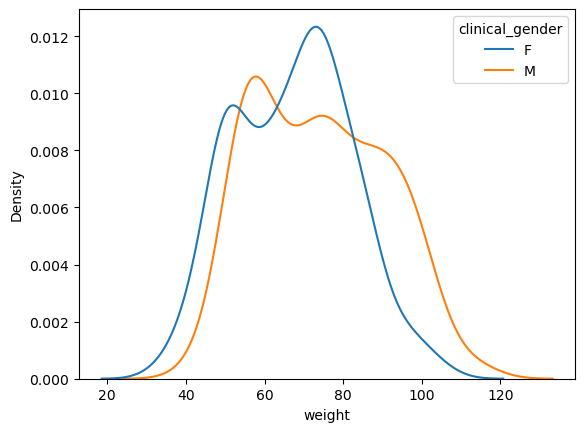

In [ ]:
sns.kdeplot(data=df_user_data, x="weight", hue="clinical_gender")

In [ ]:
sns.countplot(data=df_user_join, x="user")

In [ ]:
len(df_recipes_filter["title"].unique())

5149

In [127]:
df_user_join

,userId,nutrition_goal,clinical_gender,age_range,life_style,weight,height,projected_daily_calories,cultural_factor,allergy,BMI
0,helen8f67,lose_weight,F,70-79,Sedentary,66.36,144,920.0,vegetarian_observant,cow's milk,obesity
1,staceyb817,lose_weight,F,80-89,Sedentary,88.18,166,1192.0,kosher_observant,eggs,obesity
2,miss8a35,lose_weight,F,70-79,Very active,75.31,164,2022.0,vegetarian_observant,None,overweight
3,mary97cb,maintain_fit,F,30-39,Lightly active,47.25,150,1647.0,vegan_observant,soy,healthy
4,daniel9360,lose_weight,M,80-89,Moderately active,91.73,181,2439.0,vegan_observant,eggs,overweight
...,...,...,...,...,...,...,...,...,...,...,...
495,dr.a99f,lose_weight,M,40-49,Lightly active,69.02,157,1578.0,None,None,overweight
496,stephenaa68,lose_weight,M,60-69,Lightly active,93.57,171,1967.0,None,None,obesity
497,johna419,lose_weight,M,80-89,Moderately active,72.96,151,1757.0,None,eggs,obesity
498,darrena6f1,maintain_fit,M,50-59,Lightly active,61.41,171,1952.0,vegetarian_observant,cow's milk,healthy


In [128]:
df_user_join.to_csv("df_user_join.csv")

In [ ]:
bernoulli.rvs(0.6, size=1)[0]

1

In [129]:
class HTML_Table:
    def __init__(self, cols:int = 4, rows: List[str] = None):
        self.cols = cols
        if rows is not None:
            self.rows = rows
        else:
            self.rows = []
    
    def add_rows(self, new_rows=List[str]):
        self.rows.extend(new_rows)
      
    def add_row(self, row:str):
        self.rows.append(row)
    
    def _repr_html_(self):
        return """<table border=\"1\">
        {row}
    </table>""".format(row="\n".join(self.rows))
    
    def render(self):
        return self._repr_html_()

In [ ]:
table = HTML_Table()

In [ ]:
table.add_row("<tr><th style=\"text-align: left;\"><FONT COLOR=\"#ff0000\"> Tracking simulation: {} days</FONT></th></tr>".format(365))
table.add_row("<tr><th style=\"text-align: left;\">Total users: {}</th></tr>".format(500))
table.add_row("<tr><td colspan=\"2\">Clinical gender male: 50%</td><td colspan=\"2\">Clinical gender female: 50%</td></tr>")
table.add_row("<tr><td>Underweight users: 45 (10.0 %)</td><td>Fit users: 153 (30.0 %)</td><td>Overweight users: 152 (30.0 %)</td><td>Obese users: 153 (30.0 %)</td></tr>")
table.add_row("<tr><th>Allergies:</th><th>Allergies:</th><th>Allergies:</th><th>Allergies:</th></tr>")
table.add_row("<tr><th>Cultural factors:</th><th>Cultural factors:</th><th>Cultural factors:</th><th>Cultural factors:</th></tr>")
table.add_row("<tr>Nutrition summary</tr>")

In [ ]:
print(table.render())

<table border="1">
        <tr><th style="text-align: left;"><FONT COLOR="#ff0000"> Tracking simulation: 365 days</FONT></th></tr>
<tr><th style="text-align: left;">Total users: 500</th></tr>
<tr><td colspan="2">Clinical gender male: 50%</td><td colspan="2">Clinical gender female: 50%</td></tr>
<tr><td>Underweight users: 45 (10.0 %)</td><td>Fit users: 153 (30.0 %)</td><td>Overweight users: 152 (30.0 %)</td><td>Obese users: 153 (30.0 %)</td></tr>
<tr><th>Allergies:</th><th>Allergies:</th><th>Allergies:</th><th>Allergies:</th></tr>
<tr><th>Cultural factors:</th><th>Cultural factors:</th><th>Cultural factors:</th><th>Cultural factors:</th></tr>
<tr>Nutrition summary</tr>
    </table>


In [ ]:
table

In [ ]:
from IPython import display
from IPython.display import HTML

In [ ]:
HTML(table.render())

In [ ]:
a = df_user_join["clinical_gender"].value_counts()

In [ ]:
for x, val in a.items():
    print(x, val)

M 254
F 246


In [ ]:
a = df_user_join.groupby(by=["BMI", "clinical_gender"]).count()

In [ ]:
a.xs("healthy", level=0)["userId"]

clinical_gender
F    69
M    84
Name: userId, dtype: int64

In [130]:
def create_a_summary_table(df_total_user, dict_recommendations, simulation_days = 365, max_cols = 4, round_digits = 0):
    meals_dict = {"breakfast":0.3,
                  "morning snacks": 0.05,
                  "afternoon snacks": 0.4,
                  "lunch": 0.05,
                  "dinner": 0.2}
    # Create table 
    table = HTML_Table(cols=max_cols)
    total_users = df_total_user.shape[0]
    # Add rows to the table 
    table.add_row(
        "<tr><th style=\"text-align: center;\" colspan=\"{span_cols}\"><strong>Tracking simulation: {days} days</strong></th></tr>".format(
            span_cols=max_cols,
            days=simulation_days))
    table.add_row("<tr><td style=\"text-align: left;\" colspan=\"{span_cols}\">\
        Total users: {total_users}</td></tr>".format(
        span_cols=max_cols,
        total_users=total_users))
    # Clinical gender 
    clinical_gender_count = df_total_user["clinical_gender"].value_counts()
    # Show clinical gender 
    temp_row = []
    for idx, item in clinical_gender_count.items():
        temp_row.append(f"<td style=\"text-align: left;\" colspan=\"{max_cols/2}\">Clinical gender\
            {'male' if idx == 'M' else 'female'}: {item}\
            users ({np.round((item/total_users)*100, round_digits)} %)</td>")
    table.add_row("<tr>{row_data}</tr>".format(row_data="".join(temp_row)))
    # Health condition 
    weight_condition = df_total_user["BMI"].value_counts()
    weight_condition_gender = df_total_user.groupby(by=["BMI", "clinical_gender"]).count()
    temp_row = []
    for idx, item in weight_condition.items():
        weight_gender_count = weight_condition_gender.xs(idx, level=0)["userId"]
        temp_row.append(f"<td style=\"text-align: left;\">Health condition {idx}:\
            {item} users ({np.round((item/total_users)*100, round_digits)} %) \
                <font color=\"lightblue\">(Male: {np.round((weight_gender_count.M/item)*100, round_digits)}%</font>,\
                <font color=\"pink\">Female: {np.round((weight_gender_count.F/item)*100, round_digits)}%</font>)</td>")
    table.add_row("<tr>{row_data}</tr>".format(row_data="".join(temp_row)))
    # Allergies 
    table.add_row("<tr><th style=\"text-align: center;\" colspan=\"{span_cols}\"><strong>Allergies</strong></th></tr>".format(span_cols=max_cols))
    df_groups = df_total_user.groupby(by=["BMI", "allergy"])
    temp_row = []
    temp_cols = []
    df_counts  = df_groups.count()
    allergy_index = list(df_counts.xs("healthy", level=0).index)
    for allergy in allergy_index:
        temp_cols = []
        for hl, per_condition_patient in weight_condition.items():
            users_count = df_counts.loc[(hl, allergy), 'userId']
            temp_cols.append(f"<td style=\"text-align: left;\">{allergy}: {users_count}\
                <font color=\"red\">({np.round((users_count/total_users)*100, 2)} % total)</font> \
                <font color=\"green\">({np.round((users_count/per_condition_patient)*100, 2)} % relative)</font> </td>")
        table.add_row("<tr>{cells}</tr>".format(cells="".join(temp_cols))) 
    # Cultural factors
    table.add_row("<tr><th style=\"text-align: center;\" colspan=\"{span_cols}\"><strong>Cultural factors</strong></th></tr>".format(span_cols=max_cols))
    df_groups = df_total_user.groupby(by=["BMI", "cultural_factor"])
    temp_row = []
    temp_cols = []
    df_counts  = df_groups.count()
    allergy_index = list(df_counts.xs("healthy", level=0).index)
    for allergy in allergy_index:
        temp_cols = []
        for hl, per_condition_patient in weight_condition.items():
            users_count = df_counts.loc[(hl, allergy), 'userId']
            temp_cols.append(f"<td style=\"text-align: left;\">{allergy}: {users_count}\
                <font color=\"red\">({np.round((users_count/total_users)*100, 2)} % total)</font> \
                <font color=\"green\">({np.round((users_count/per_condition_patient)*100, 2)} % relative)</font> </td>")
        table.add_row("<tr>{cells}</tr>".format(cells="".join(temp_cols))) 
    # Food summary 
    table.add_row("<tr><th style=\"text-align: center;\" colspan=\"{span_cols}\"><strong>Food Summary</strong></th></tr>".format(span_cols=max_cols))
    temp_dict = {}
    for key, _ in weight_condition.items():
        df_users_list = []
        users = df_total_user[df_total_user["BMI"] == key]["userId"].tolist()
        for u in users:
            df_users_list.append(dict_recommendations[u])
        temp_dict[key] = pd.concat(df_users_list, axis=0)
    # visualize 
    total_recipes = []
    total_recipes_unique = []
    total_recipes_per_meal = {}
    temp_row = []
    temp_cols = []
    df_counts  = df_groups.count()
    meals_index = list(meals_dict.keys())
    for meal in meals_index:
        temp_cols = []
        for hl,_ in weight_condition.items():
            mean = temp_dict[hl][f"{meal}_calories"].mean()
            std = temp_dict[hl][f"{meal}_calories"].std()
            recipes = len(temp_dict[hl][meal])
            unique_recipes = len(temp_dict[hl][meal].unique())
            temp_cols.append(f"<td style=\"text-align: left;\">{meal}: {recipes} recipes ({unique_recipes} unique recipes),\
                calories: {np.round(mean, 1)} Kcals &plusmn; {np.round(std, 1)} Kcals </td>")
        table.add_row("<tr>{cells}</tr>".format(cells="".join(temp_cols))) 
    # Total recipes 
    table.add_row("<tr><th style=\"text-align: center;\" colspan=\"{span_cols}\"><strong>Totals</strong></th></tr>".format(span_cols=max_cols))
    for key, _ in weight_condition.items():
        total_recipes.append(len(temp_dict[key])) 
        list_vals = [len(temp_dict[key][x].unique()) for x in meals_dict.keys()]
        print(list_vals)
        flat_list = []
        total_recipes_unique.append(sum(list_vals))
    table.add_row("<tr>{values}</tr>".format(
            values = "".join([f"<td style=\"text-align: left;\">Total recommend meals: {total_recipes[i]} ({total_recipes_unique[i]} unique)</td>" for i in range(len(total_recipes))])))
    # total recipes per meal 
    total_df_list = [temp_dict[k] for k in temp_dict.keys()]
    total_df = pd.concat(total_df_list, axis=0)
    for meal in meals_dict.keys():
        total_recommendations = len(total_df[meal])
        total_meal = len(total_df[meal].unique())
        table.add_row(f"<tr><td style=\"text-align: left;\", colspan={max_cols}>Total {meal}:\
            {total_recommendations} ({total_meal} uniques)</td></tr>")
    return table

In [131]:
table = create_a_summary_table(df_user_join, simulation_results)

[821, 1285, 991, 1409, 1533]
[872, 1572, 1009, 1557, 1525]
[835, 1304, 1009, 1430, 1584]
[809, 786, 979, 932, 1478]


In [132]:
table

In [133]:
# Save the recommendations 
for key in simulation_results.keys():
    data = simulation_results[key]
    data.to_csv(f"userid_{key}_recommendations.csv")

In [ ]:
# create html file for console 
text = f"""
<!DOCTYPE html>
<html>
<head>
<title></title>
</head>
<body>
{table.render()}
</body>
</html>
"""

In [ ]:
with open("summary.html", "w") as fp:
    fp.write(text)

In [ ]:
HTML(text)

In [1]:
simulation_results

NameError: name 'simulation_results' is not defined